In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('uad.csv')

In [3]:
df['content']

0       @waluyo_iyo @muhammadiyah wajar namanya begitu...
1       RS UAD Raih Akreditasi Bintang Empat https://t...
2       RS UAD Raih Akreditasi Bintang Empat https://t...
3       RS UAD Raih Akreditasi Bintang Empat https://t...
4       Soto pak nanang di deket kampus 3 uad mas. htt...
                              ...                        
4865            @impcblehibiscus Uad jurusan anjir wkwkwk
4866    🕍 PAVILIUN BARU\n.\n.\n📌 LOKASI\n•Semail Bangu...
4867    Kampus UAD kini punya Lab School di Sambas Kal...
4868    pwmu:  Kunjungi Kalimantan, Rektor Ini Sempatk...
4869             Uad liburnya setahun, tgl 31 des - 6 jan
Name: content, Length: 4870, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('uad-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0       iyo wajar namanya begitu karena uad utk menamp...
1                    rs uad raih akreditasi bintang empat
2                    rs uad raih akreditasi bintang empat
3                    rs uad raih akreditasi bintang empat
4                 soto pak nanang di deket kampus uad mas
                              ...                        
4865                             uad jurusan anjir wkwkwk
4866    paviliun baru lokasi semail bangunharjo sewon ...
4867    kampus uad kini punya lab school di sambas kal...
4868    pwmu kunjungi kalimantan rektor ini sempatkan ...
4869                     uad liburnya setahun tgl des jan
Name: content, Length: 4870, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0       iyo wajar nama begitu karena uad utk tampung m...
1                    rs uad raih akreditasi bintang empat
2                    rs uad raih akreditasi bintang empat
3                    rs uad raih akreditasi bintang empat
4                 soto pak nanang di deket kampus uad mas
                              ...                        
4865                               uad jurus anjir wkwkwk
4866    paviliun baru lokasi semail bangunharjo won ba...
4867    kampus uad kini punya lab school di sambas kal...
4868    pwmu kunjung kalimantan rektor ini sempat motr...
4869                          uad libur tahun tgl des jan
Name: content, Length: 4870, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0       iyo wajar nama uad utk tampung mahasiswa yg yd...
1                          rs uad raih akreditasi bintang
2                          rs uad raih akreditasi bintang
3                          rs uad raih akreditasi bintang
4                        soto nanang deket kampus uad mas
                              ...                        
4865                               uad jurus anjir wkwkwk
4866    paviliun lokasi semail bangunharjo won bantul ...
4867    kampus uad lab school sambas kalbar salah daer...
4868    pwmu kunjung kalimantan rektor motret gerhana ...
4869                                uad libur tgl des jan
Name: content, Length: 4870, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('uad-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-uad.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [20]:
dfcst_preprocessed

0       [iyo, wajar, nama, uad, utk, tampung, mahasisw...
1                    [rs, uad, raih, akreditasi, bintang]
2                    [rs, uad, raih, akreditasi, bintang]
3                    [rs, uad, raih, akreditasi, bintang]
4                 [soto, nanang, deket, kampus, uad, mas]
                              ...                        
4865                          [uad, jurus, anjir, wkwkwk]
4866    [paviliun, lokasi, semail, bangunharjo, won, b...
4867    [kampus, uad, lab, school, sambas, kalbar, sal...
4868    [pwmu, kunjung, kalimantan, rektor, motret, ge...
4869                          [uad, libur, tgl, des, jan]
Name: content, Length: 4870, dtype: object

In [21]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [22]:
tag = ct.tag_sents(dfcst_preprocessed)

In [23]:
tag

[[('iyo', 'NN'),
  ('wajar', 'JJ'),
  ('nama', 'NN'),
  ('uad', 'NN'),
  ('utk', 'NN'),
  ('tampung', 'VB'),
  ('mahasiswa', 'NN'),
  ('yg', 'FW'),
  ('ydj', 'FW'),
  ('kuliah', 'NN'),
  ('muhammadiyah', 'NN')],
 [('rs', 'NN'),
  ('uad', 'NN'),
  ('raih', 'VB'),
  ('akreditasi', 'NN'),
  ('bintang', 'NN')],
 [('rs', 'NN'),
  ('uad', 'NN'),
  ('raih', 'VB'),
  ('akreditasi', 'NN'),
  ('bintang', 'NN')],
 [('rs', 'NN'),
  ('uad', 'NN'),
  ('raih', 'VB'),
  ('akreditasi', 'NN'),
  ('bintang', 'NN')],
 [('soto', 'NN'),
  ('nanang', 'NN'),
  ('deket', 'FW'),
  ('kampus', 'FW'),
  ('uad', 'FW'),
  ('mas', 'FW')],
 [('kali', 'NN'),
  ('gua', 'CD'),
  ('jogja', 'NN'),
  ('suguhin', 'FW'),
  ('soto', 'FW'),
  ('nanang', 'FW'),
  ('yg', 'FW'),
  ('deket', 'FW'),
  ('kampus', 'FW'),
  ('uad', 'FW'),
  ('ya', 'NN'),
  ('allah', 'NN'),
  ('ga', 'NN'),
  ('sihh', 'NN'),
  ('ni', 'NN'),
  ('soto', 'NN'),
  ('jual', 'VB'),
  ('jakarta', 'NN'),
  ('ajaa', 'NN'),
  ('enak', 'NN'),
  ('bangettt', 'FW'),


In [24]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [25]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [26]:
df_tagger

,Word,POS
0,iyo,NN
1,wajar,JJ
2,nama,NN
3,uad,NN
4,utk,NN
...,...,...
53567,uad,FW
53568,libur,FW
53569,tgl,FW
53570,des,FW


# Rename POS Tagger

In [27]:
df_tagger.to_csv('uad-tagger.csv')

### Merge Dataset

In [28]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [29]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

In [50]:
weighted_tag.to_csv('weighted_tag-uad.csv')

In [31]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

In [32]:
pos_tag.to_csv('pos_tag-uad.csv')

### bi-gram

In [33]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(ahmad, dahlan)         275
(universitas, ahmad)    246
(kampus, uad)           214
(id, ligamahasiswa)     191
(anak, uad)             187
                       ... 
(uad, eue)                1
(sso, bimawa)             1
(acara, selamat)          1
(ki, thi)                 1
(data, buka)              1
Length: 34729, dtype: int64

In [34]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [35]:
bigram_df

,index,bigram
0,"(ahmad, dahlan)",275
1,"(universitas, ahmad)",246
2,"(kampus, uad)",214
3,"(id, ligamahasiswa)",191
4,"(anak, uad)",187
5,"(badminton, kaskus)",180
6,"(uad, uad)",175
7,"(kaskus, cjyc)",173
8,"(cjyc, season)",165
9,"(season, id)",162


In [36]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [37]:
d

[{('ahmad', 'dahlan'): 275,
  ('universitas', 'ahmad'): 246,
  ('kampus', 'uad'): 214,
  ('id', 'ligamahasiswa'): 191,
  ('anak', 'uad'): 187,
  ('badminton', 'kaskus'): 180,
  ('uad', 'uad'): 175,
  ('kaskus', 'cjyc'): 173,
  ('cjyc', 'season'): 165,
  ('season', 'id'): 162,
  ('skor', 'badminton'): 158,
  ('uad', 'kampus'): 158,
  ('ligamahasiswa', 'kaskus'): 126,
  ('game', 'skor'): 124,
  ('kaskus', 'court'): 123,
  ('court', 'regu'): 113,
  ('uad', 'yogyakarta'): 101,
  ('mahasiswa', 'uad'): 91,
  ('uad', 'vs'): 87,
  ('regu', 'putra'): 82}]

In [38]:
import networkx as nx

In [56]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uad",weight=100)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

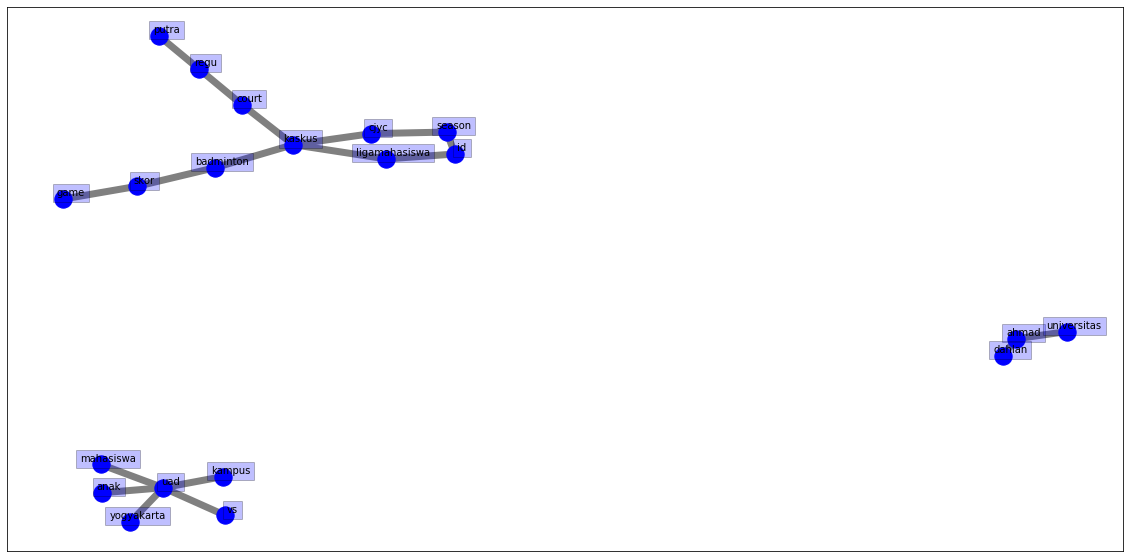

In [58]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [59]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(universitas, ahmad, dahlan)    234
(badminton, kaskus, cjyc)       173
(season, id, ligamahasiswa)     162
(cjyc, season, id)              161
(kaskus, cjyc, season)          161
                               ... 
(jamu, indonesia, uad)            1
(ujug, langsung, tuju)            1
(googlemap, alamat, lengkap)      1
(studentclass, uad, juara)        1
(syukur, ketemu, anak)            1
Length: 43230, dtype: int64

In [60]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [61]:
trigram_df

,index,trigram
0,"(universitas, ahmad, dahlan)",234
1,"(badminton, kaskus, cjyc)",173
2,"(season, id, ligamahasiswa)",162
3,"(cjyc, season, id)",161
4,"(kaskus, cjyc, season)",161
5,"(skor, badminton, kaskus)",155
6,"(id, ligamahasiswa, kaskus)",126
7,"(game, skor, badminton)",120
8,"(kaskus, court, regu)",94
9,"(ligamahasiswa, kaskus, court)",83


In [62]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [63]:
d1

[{('universitas', 'ahmad', 'dahlan'): 234,
  ('badminton', 'kaskus', 'cjyc'): 173,
  ('season', 'id', 'ligamahasiswa'): 162,
  ('cjyc', 'season', 'id'): 161,
  ('kaskus', 'cjyc', 'season'): 161,
  ('skor', 'badminton', 'kaskus'): 155,
  ('id', 'ligamahasiswa', 'kaskus'): 126,
  ('game', 'skor', 'badminton'): 120,
  ('kaskus', 'court', 'regu'): 94,
  ('ligamahasiswa', 'kaskus', 'court'): 83,
  ('court', 'regu', 'putra'): 68,
  ('uad', 'game', 'skor'): 62,
  ('id', 'ligamahasiswa', 'awalmasadepan'): 54,
  ('court', 'regu', 'putri'): 45,
  ('ahmad', 'dahlan', 'uad'): 43,
  ('regu', 'putra', 'md'): 39,
  ('regu', 'putra', 'ms'): 34,
  ('special', 'region', 'of'): 33,
  ('ahmad', 'dahlan', 'yogyakarta'): 32,
  ('ligamahasiswa', 'awalmasadepan', 'kaskus'): 31}]

In [64]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uad",weight=100)

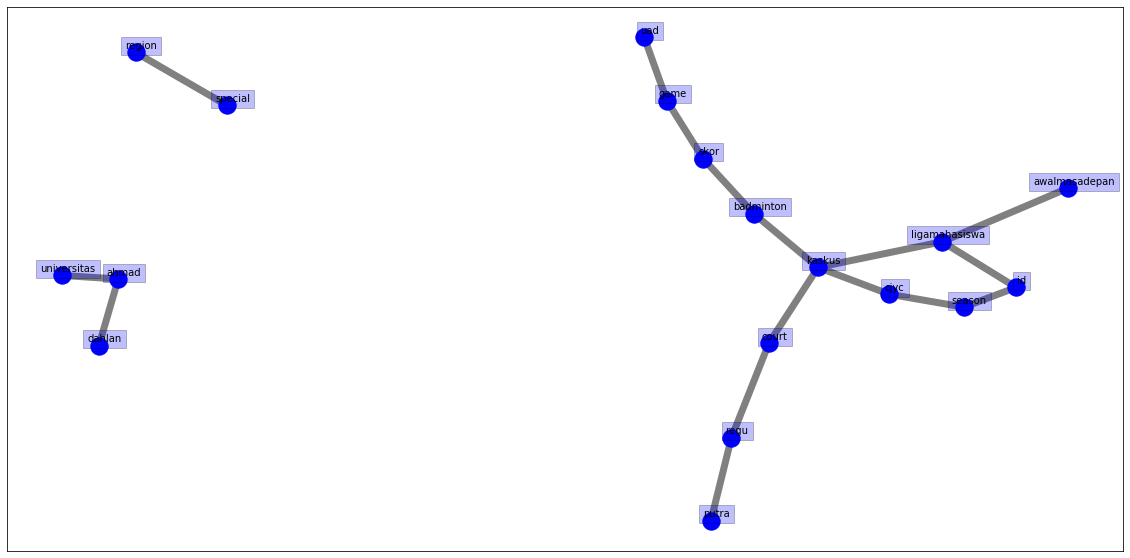

In [72]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [49]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus islam jogja\\uad'

In [52]:
pos_tag.head(50)

,Word,Weight,POS
0,selamat,40.433362,JJ
1,nasional,19.630443,JJ
2,salah,17.572667,JJ
3,bagus,17.072036,JJ
4,nyata,15.720397,JJ
5,kaya,15.479770,JJ
6,wkwkwk,14.705015,JJ
7,bantul,13.591022,JJ
8,bikin,12.335438,JJ
9,utama,10.465539,JJ
